In [5]:
from nmm import csolve,OhmicBath,OverdampedBath
from qutip import Qobj,sigmaz,sigmax,sigmay
import numpy as np
import matplotlib.pyplot as plt

In [6]:
w0 = 1
alpha = 0.05
gamma = 5
T = 1*w0
tf = 40
t=np.linspace(0,tf,200)
Hsys = sigmaz()/2
Q = sigmax()

In [7]:
bath=OverdampedBath(T,alpha,gamma)

In [8]:
cc2 = csolve(Hsys, t ,[bath], [Q],eps=1e-5)

In [9]:
rho0=0.5*Qobj([[1,1],[1,1]])

In [10]:
result=cc2.evolution(rho0)
#result2=cc.evolution(rho0)

1


Computing Exponential of Generators . . . .: 100%|██████████| 200/200 [00:00<00:00, 1801.88it/s]


In [11]:
cc2.generators[10]

Quantum object: dims=[[[2], [2]], [[2], [2]]], shape=(4, 4), type='super', isherm=False
Qobj data =
[[-0.36588228+0.j         0.        +0.j         0.        +0.j
   0.16947668+0.j       ]
 [ 0.        +0.j        -0.26767948+0.j        -0.04892008-0.1041142j
   0.        +0.j       ]
 [ 0.        +0.j        -0.04892008+0.1041142j -0.26767948+0.j
   0.        +0.j       ]
 [ 0.36588228+0.j         0.        +0.j         0.        +0.j
  -0.16947668+0.j       ]]

In [12]:
def population(den, a, b):
    return [den[i][a, b] for i in range(len(den))]

In [22]:
from qutip.solver.heom import DrudeLorentzPadeBath,HEOMSolver

In [23]:
bath = DrudeLorentzPadeBath(Q=Q, lam=alpha*np.pi, gamma=gamma, T=T, Nk=8)
solver = HEOMSolver(Hsys, bath, max_depth=5)
result_h = solver.run(rho0, t)

10.1%. Run time:   3.76s. Est. time left: 00:00:00:33
20.1%. Run time:   7.78s. Est. time left: 00:00:00:30
30.2%. Run time:  11.76s. Est. time left: 00:00:00:27
40.2%. Run time:  15.67s. Est. time left: 00:00:00:23
50.3%. Run time:  19.49s. Est. time left: 00:00:00:19
60.3%. Run time:  23.17s. Est. time left: 00:00:00:15
70.4%. Run time:  26.84s. Est. time left: 00:00:00:11
80.4%. Run time:  30.42s. Est. time left: 00:00:00:07
90.5%. Run time:  33.85s. Est. time left: 00:00:00:03
100.0%. Run time:  37.19s. Est. time left: 00:00:00:00
Total run time:  37.19s


In [15]:
from qutip import brmesolve

In [33]:
def br(rho0,sec=-1):
    a_ops = [[Q,bath.power_spectrum]]
    resultBR = brmesolve(
        Hsys, rho0, t, a_ops=a_ops,sec_cutoff=sec
    )
    return resultBR

In [34]:
resultBR=br(rho0)

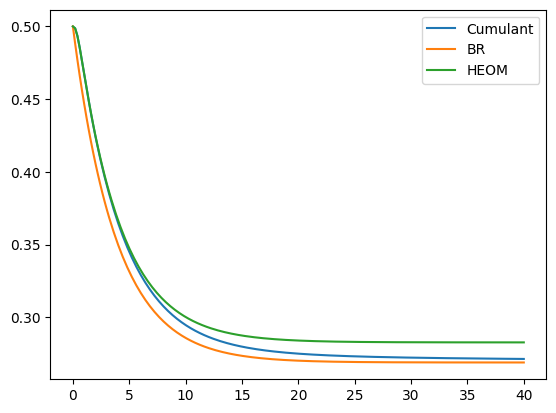

In [36]:
i,j=0,0
plt.plot(t, np.abs(population(result, i, j)),label='Cumulant')
plt.plot(t, np.abs(population(resultBR.states, i, j)),label='BR')
plt.plot(t, np.abs(population(result_h.states, i, j)),label='HEOM')
plt.legend()
plt.show()
